In [1]:
#Immport all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,chisquare,chi2_contingency

# Reading the data

In [2]:
df = pd.read_csv("Titanic data.csv")
#This is a titanic dta set which we have to predict whether person is survive or not ?

In [3]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Identification of dependent(target) and independent variables

since we have to predict survival of person,here,Survived column is identified as target variable and remaining all are independent variables..

In [6]:
df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Identification of Categorical and Continuous Variables

In [7]:
 df.dtypes
#identify categorical and continuous variables

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here pandas store categorical variables as objects and continuous variables as int,float..By this we can identify categorical and continuous varibles

# Implementation of Univariate Analysis for Continuous Variables

In [8]:
#using the  describe function on continuous variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

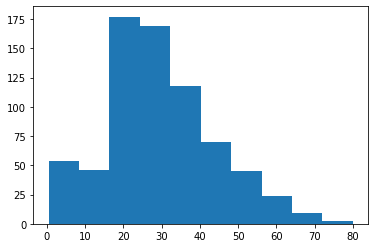

In [9]:
#plotting histogram chart for age variable
#df["Age"].plot.hist()
plt.hist(df["Age"])

<AxesSubplot:>

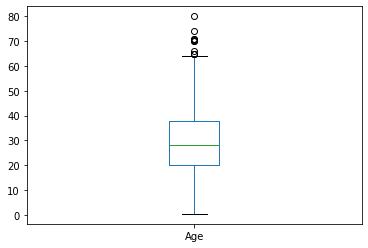

In [10]:
#plotting box plot for age varaible
df["Age"].plot.box()

#  Implementation of Univariate Analysis for Categorical Variables

In [11]:
#creating frequency table for categorical variable 'Sex'
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
a=len(df["Sex"]) #Total length(rows) for Sex varaible
a

891

In [13]:
#creating percentages from frequencies
df["Sex"].value_counts()/a

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<AxesSubplot:>

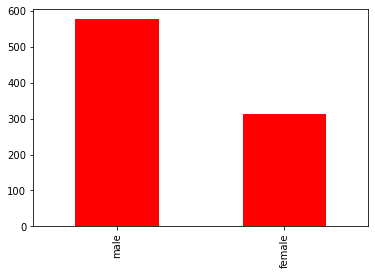

In [14]:
#creating bar plot for sex frequencies
df["Sex"].value_counts().plot.bar(color = "red")

<AxesSubplot:>

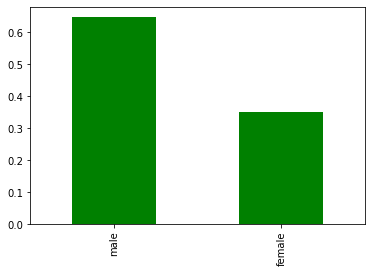

In [15]:
#creating bar plot for percentages in sex frequencies
(df["Sex"].value_counts()/a).plot.bar(color = "green")

# Bivarient Analysis For Continuous-Continuous
Is the fare increase with increase of Age ?

<AxesSubplot:xlabel='Age', ylabel='Fare'>

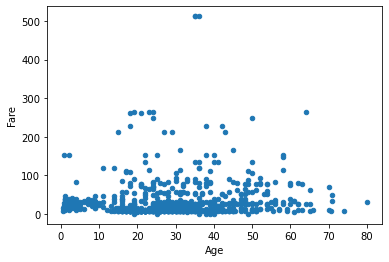

In [16]:
#As age and fare are continuous. so draw scatter plot bewtween these 
df.plot.scatter("Age","Fare")

In [17]:
#No w find correaltion between these to know relation
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [18]:
df["Age"].corr(df["Fare"]) #It is very very less .so there is no relation stronger relationship

0.09606669176903888

# Bivarient Analysis For Categorical-Continuous

Is Age Mean of Male is more than Age mean of Female ??

<AxesSubplot:xlabel='Sex'>

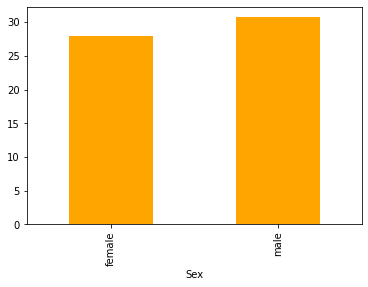

In [19]:
#relation b/w mean age of males and mean age of females,here age-continuous,gender-categorical
df.groupby('Sex')["Age"].mean().plot.bar(color = "Orange")

In [20]:
male =  df[df["Sex"] == "male"]

In [21]:
female = df[df["Sex"] =="female"]

In [22]:
ttest_ind(male['Age'],female['Age'],nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

AS p-value is < 0.05 so mean ages of male and female are statistically different

# Bivarient Analysis For Categorical-Categorical


who will Survive More Female or male ??

In [23]:
#2 way table fro sex and survive
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [24]:
chi2_contingency(pd.crosstab(df['Survived'],df['Sex']))
#first value is chi square statistic and second is pvalue.

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

as p-value is much less than 0.05 .survival rate for both is different.
females will survive more

#  Implementation Of Treating Missing Values

In [25]:
df1= pd.read_csv("missingvalues_data.csv")

In [26]:
df1.shape

(891, 12)

In [27]:
df1.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
df1.describe() #this is only for continuous variables and if we look in categircal it wont show.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
#finding missing values in the dataset
df1.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
df1.isnull().sum() #it tells how many missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
#dropping all rows wherever it contains missing values
df1.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [32]:
df1.dropna().isnull().sum() #again check if there is any missing value.we won't find any because we removed rows which contains missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
#dropping rows where all the entries are missing
df1.dropna(how='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
df1.dropna(how='all').shape

(891, 12)

In [35]:
#dropping columns with any missing value
df1.dropna(axis=1).shape

(891, 9)

In [36]:
#filling all the missing values in a dataframe with 0

df1.fillna(0)

#df1.fillna(0, inplace= True ) for saving in original data also


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
df1['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [38]:
#now fill the issing value of their mean
df1["Age"].fillna(df1["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

# Outlier Treatment

Here,we have 2  types of outliers :  1.Univariate 2.Bivariate
univariate can be identified by boxplot and bivariate can identified by scatter plot.

# Univariate outlier detection

In [76]:
df5= pd.read_csv("data2.csv")
df5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
df5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

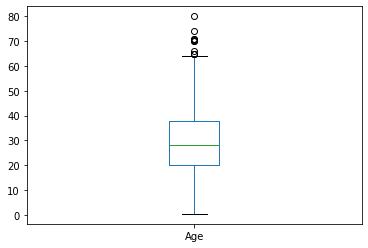

In [78]:
#Creating age boxploy
#upper fence represents maximum value.and about that are considered as outliers in a singl age value
df5["Age"].plot.box()

Outliers present at age >65

# Bivariate outlier detection

<AxesSubplot:xlabel='Age', ylabel='Fare'>

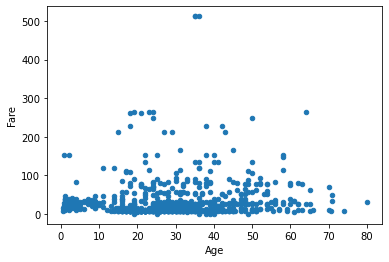

In [79]:
#creating scatter plot for age and fare variables
df5.plot.scatter("Age","Fare")
#here we can easily identify outliers.2 points are >500 remaining all  all in one range


# Treating Outliers

   # 1. Removing outliers from dataset

<AxesSubplot:xlabel='Age', ylabel='Fare'>

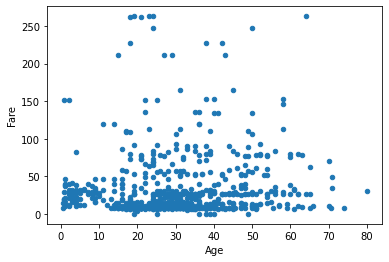

In [80]:
df5=df5[df5["Fare"]<=300]
df5.plot.scatter("Age","Fare")

# 2.Replacing outliers in age with mean age value

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<AxesSubplot:>

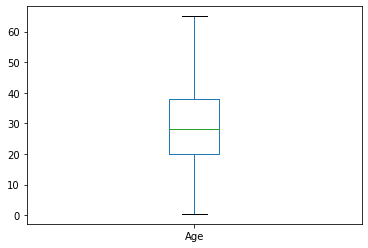

In [82]:
df5.loc[df5["Age"]>65,"Age"]=np.mean(df5["Age"])
df5["Age"].plot.box()

# Transforming the variables which is last step in Data Exploration 

In [87]:
df6=pd.read_csv("titanic data.csv")

In [88]:
df6.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='Frequency'>

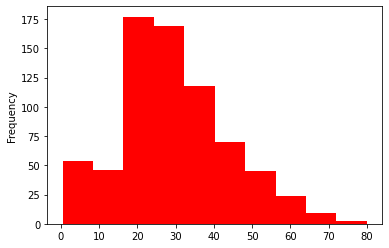

In [93]:
df6['Age'].plot.hist(color = "red")
#it is a right skewed,since majority of values concentrated on left side.

<AxesSubplot:ylabel='Frequency'>

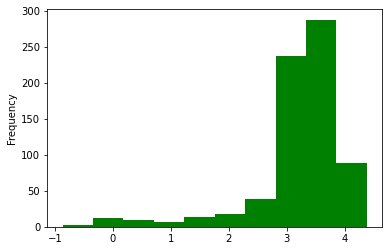

In [96]:
np.log(df6['Age']).plot.hist(color = "green")
#here it is extreme left skewed since skewness is more than original so check others

<AxesSubplot:ylabel='Frequency'>

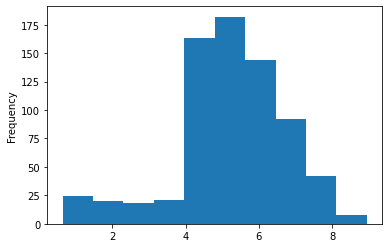

In [98]:
np.sqrt(df6['Age']).plot.hist()
#It is somewhat better compared to log..
#here it is more symmetric comared to original variable

<AxesSubplot:ylabel='Frequency'>

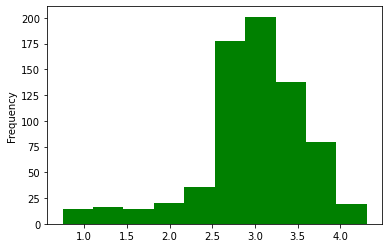

In [99]:
np.power(df6['Age'],1/3).plot.hist(color = "green")
#it is lightly left skewed so go wiith square root as it gives more symmetric.

# Binning is another method in variable transformation

In [114]:
bins = [1,15,80] 
#it means we are creating 2 bins 0-15,15-80
group = ["Child","Adult"]
df6['type']=pd.cut(df6['Age'],bins,labels=group)

In [115]:
df6.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [116]:
df6["type"].value_counts()

Adult    631
Child     69
Name: type, dtype: int64